In [ ]:
!pip install xgboost
!pip install seaborn

Import all the necessary libraries.

In [9]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import wilcoxon

Print the versions of the libraries

In [10]:
print("Library Versions:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
print(f"SciPy: {scipy.__version__}")


Library Versions:
Pandas: 2.2.3
NumPy: 1.26.4
Matplotlib: 3.9.4
Seaborn: 0.13.2
Scikit-learn: 1.6.1
XGBoost: 2.1.4
SciPy: 1.13.1


Read dataset from the CSV and display the top rows.

In [11]:
df_Original = pd.read_csv("water_potability.csv")

df_Original.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Determine the number of rows and columns in the dataset.

In [12]:
num_rows = df_Original.shape[0]
num_columns = df_Original.shape[1]
print(f"Number of rows in the dataset: {num_rows}")
print(f"Number of columns in the dataset: {num_columns}")

Number of rows in the dataset: 3276
Number of columns in the dataset: 10


List the names of all the columns in the dataset.

In [13]:
df_Original.columns.tolist()


['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

Display the detailed information about the dataset such as columns, datatype and index range.

In [14]:
df_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Display the basic statistics of all the columns.

In [15]:
df_Original.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Determine the count of missing values for each column. Display the count and the percentage of the missing values related to the total number of data values.

In [16]:
missing_values = df_Original.isnull().sum()
missing_percent = (missing_values / len(df_Original)) * 100
missing_df = pd.DataFrame({
    'Missing Values count': missing_values,
    'Percentage (%)': missing_percent
})
missing_df


,Missing Values count,Percentage (%)
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


The above table shows that only three columns have mising values whcih are ph, Sulfate and Trihalomethanes.

Separate the target column, potability value counts and calculate the class distribution

In [17]:
print(df_Original['Potability'].value_counts())
print("\nClass Distribution (%):")
print(df_Original['Potability'].value_counts(normalize=True) * 100)

Potability
0    1998
1    1278
Name: count, dtype: int64

Class Distribution (%):
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


Draw the bar chart for the distribution of potability data.

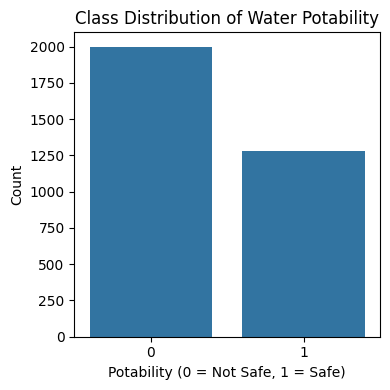

In [18]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Potability', data=df_Original)

plt.title("Class Distribution of Water Potability")
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig('potability_class_distribution.png', dpi=300)
plt.show()

# Handling Missing Values
Since the dataset is composed of only numeric values, the missing values can be handled using the measures of central tendency which includes mean, median and mode.



*   In order to determine which measure should be used for handling missing values we will rely on the distribution of the data.


*   Since the target variable potability is boolean (0, or 1), the best way to handle the missing values is to separately determine those values for potable and non-potable data.






Divide the original dataset into the potable and non-potable dataframe.

In [19]:
df_potable = df_Original[df_Original.Potability == 1]
df_non_potable = df_Original[df_Original.Potability == 0]

Plot the data distribution for ph, Sulfate and Trihalomethanes. Dealing with Potable data first.

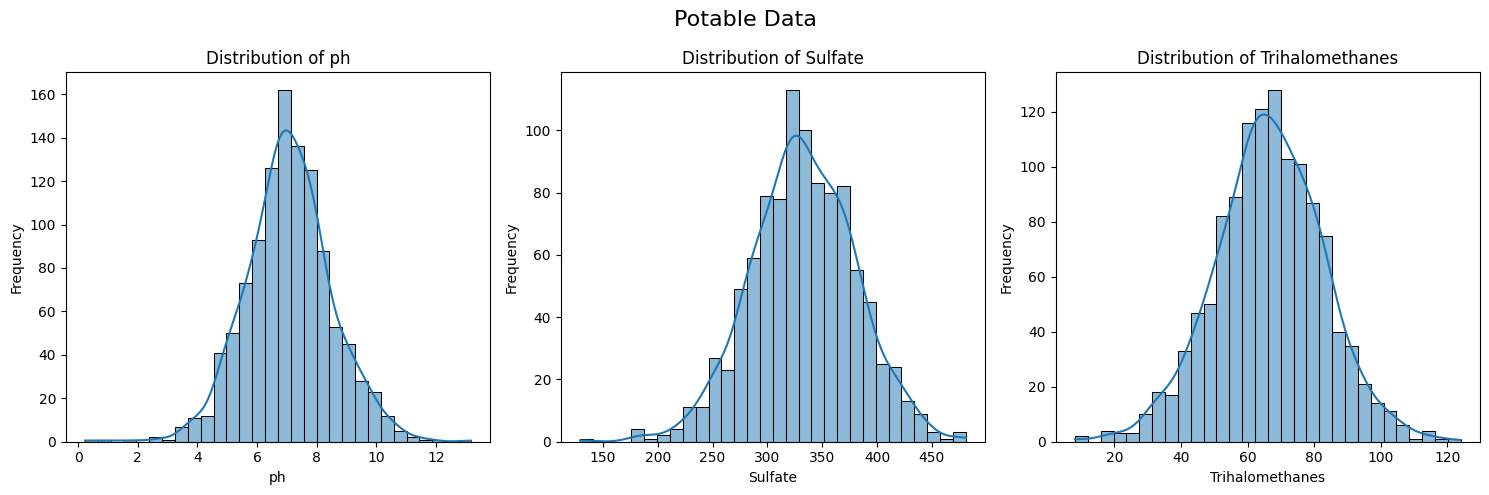

In [20]:
columns_to_plot = ['ph', 'Sulfate', 'Trihalomethanes']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_potable[col], bins=30, kde=True)
    plt.suptitle('Potable Data', fontsize=16)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('potable_data_class_distribution.png', dpi=300)
plt.show()


Now plot the distribution for the non potable data.

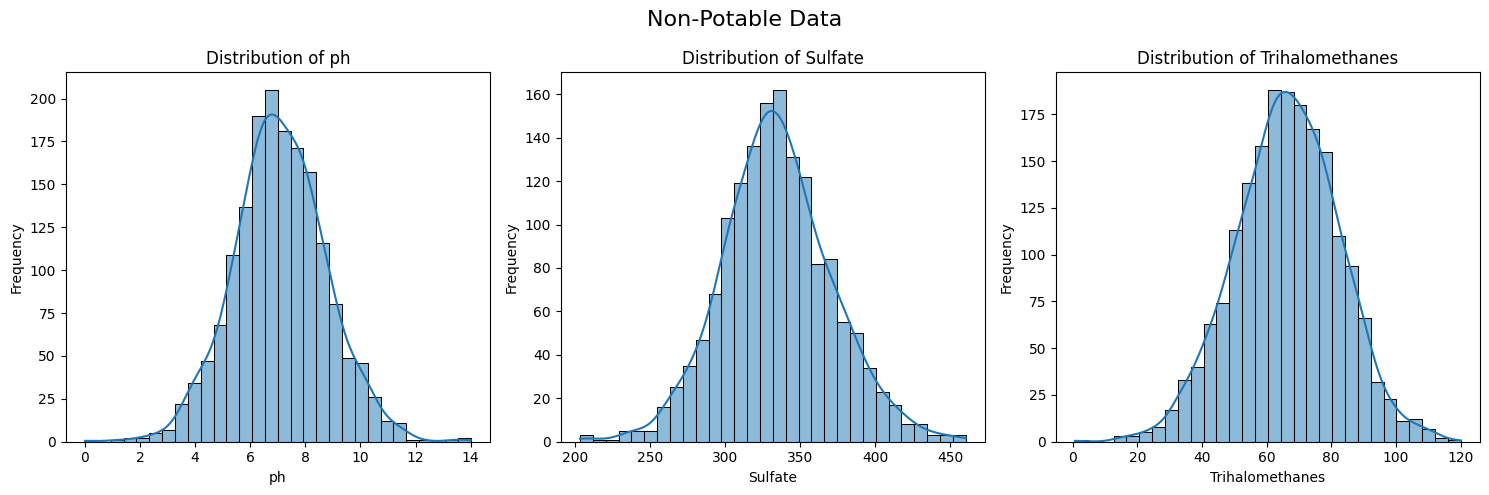

In [21]:
columns_to_plot = ['ph', 'Sulfate', 'Trihalomethanes']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_non_potable[col], bins=30, kde=True)
    plt.suptitle('Non-Potable Data', fontsize=16)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('non_potable_data_class_distribution.png', dpi=300)
plt.show()

By observing the data distribution graphs it can be determined that the graphs for both types of data are almost normally distributed. Since the graphs are normally distributed using the mode for missing values is not appropriate.

Now determine the mean and median values for potable data.

In [22]:
mean_values_potable = df_potable[columns_to_plot].mean()
median_values_potable = df_potable[columns_to_plot].median()

print("Potable Data: \n")
print("Mean values:")
print(mean_values_potable)
print("\nMedian values:")
print(median_values_potable)

Potable Data: 

Mean values:
ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

Median values:
ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64


Data values for mean and median is almost same because the data distribution is symmetric.

Determine the mean and median for the non potable dataset.

In [23]:
mean_values_nonpotable = df_non_potable[columns_to_plot].mean()
median_values_nonpotable = df_non_potable[columns_to_plot].median()

print("Non Potable Data: \n")
print("Mean values:")
print(mean_values_nonpotable)
print("\nMedian values:")
print(median_values_nonpotable)

Non Potable Data: 

Mean values:
ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

Median values:
ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64


There is a slight difference between the ph mean and median whereas the remaining values are almost same.

We will consider the mean values for missing data handling but handle the missing values for non-potable and potable data separately.

In [24]:
for col in ['ph', 'Sulfate', 'Trihalomethanes']:
    col_mean_potable = df_potable[col].mean()
    df_potable.loc[:, col] = df_potable[col].fillna(col_mean_potable)

    col_mean_nonpotable = df_non_potable[col].mean()
    df_non_potable.loc[:, col] = df_non_potable[col].fillna(col_mean_nonpotable)

Combine the two datasets after handling the missing values and check if there still exist any missing value.

In [25]:
df_updated = pd.concat([df_potable, df_non_potable])
df_updated.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Plot data distributions

Plot the class distribution of all the columns after missing data is handled.


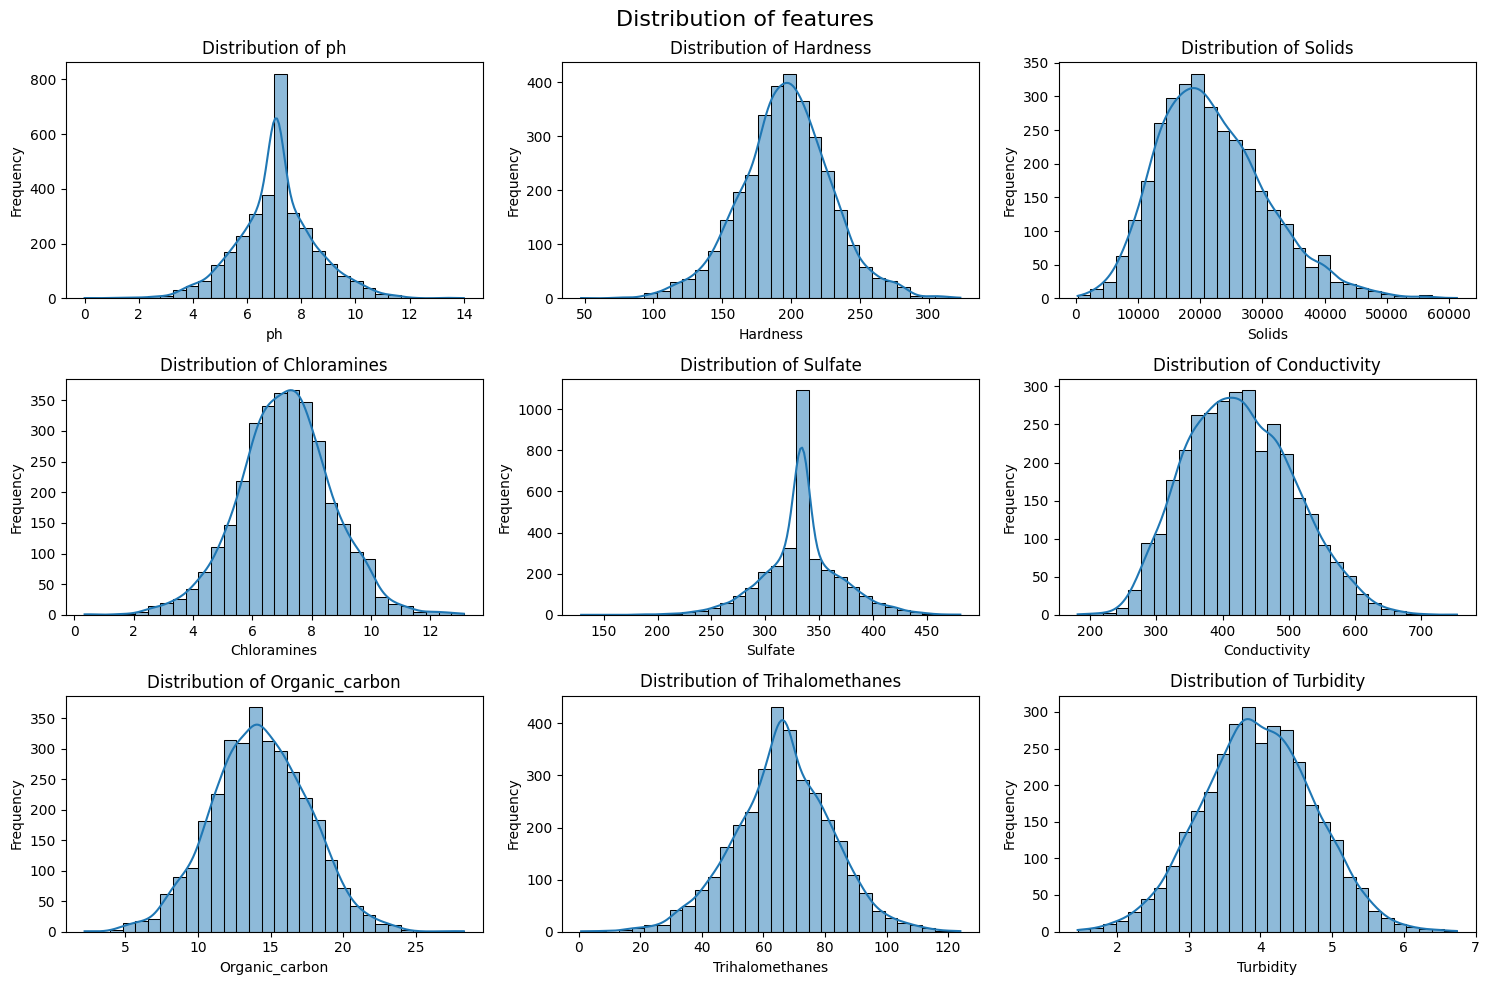

In [26]:
columns_to_plot = [col for col in df_updated.columns if col != 'Potability']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_updated[col], bins=30, kde=True)
    plt.suptitle('Distribution of features', fontsize=16)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots
Now plot the boxplots for the data to determine how data is disributed such as outliers and spread.

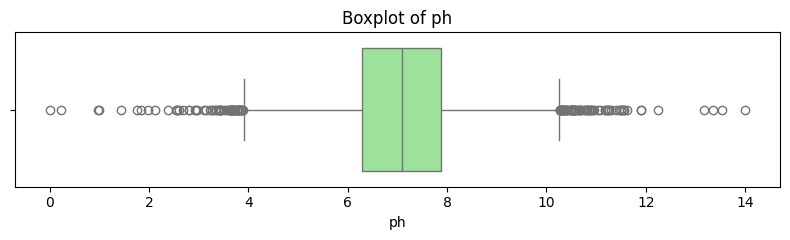

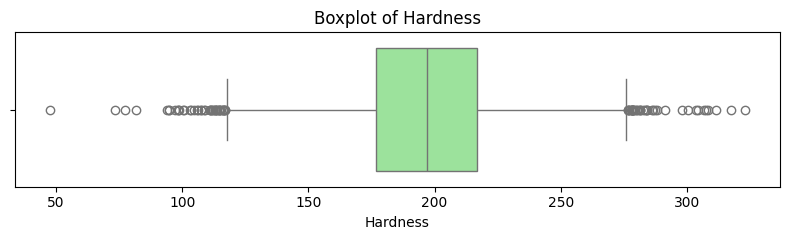

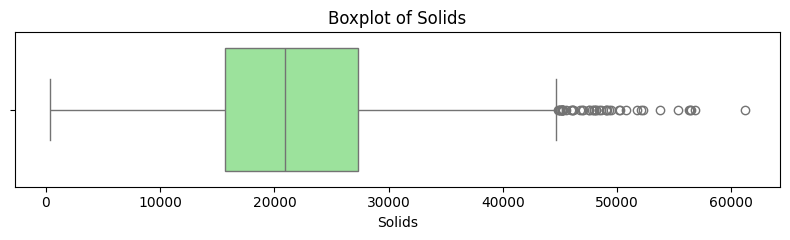

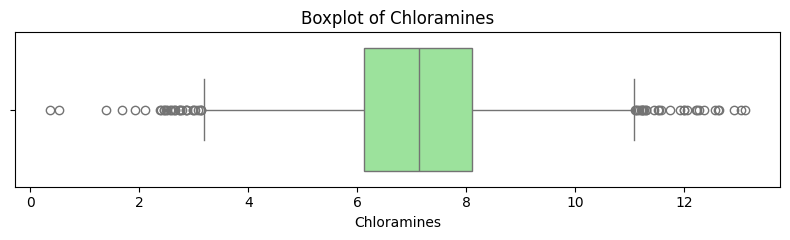

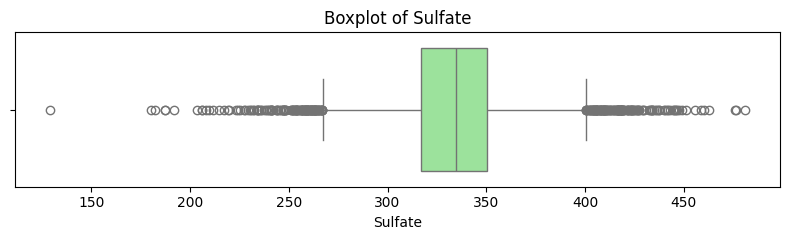

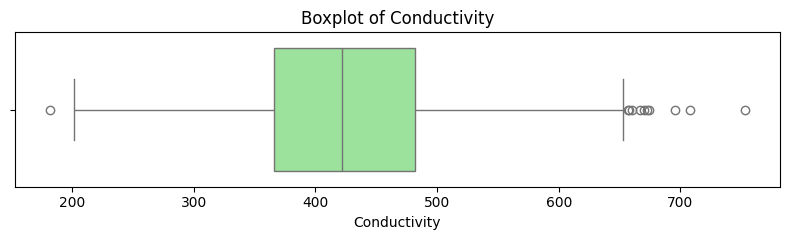

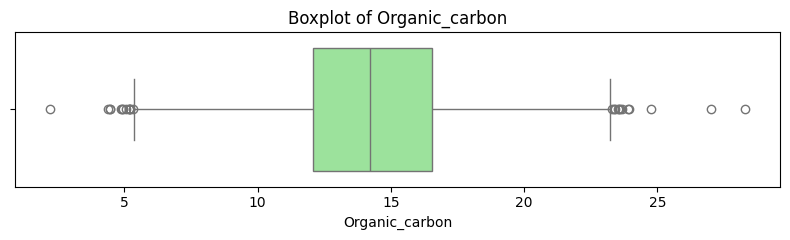

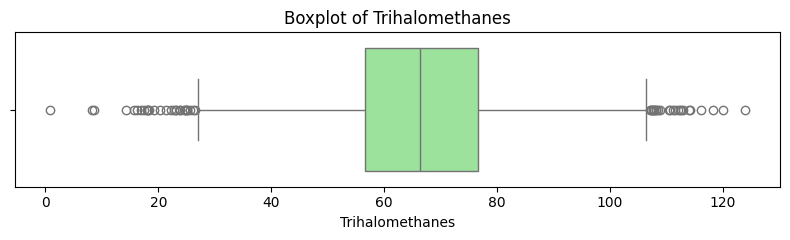

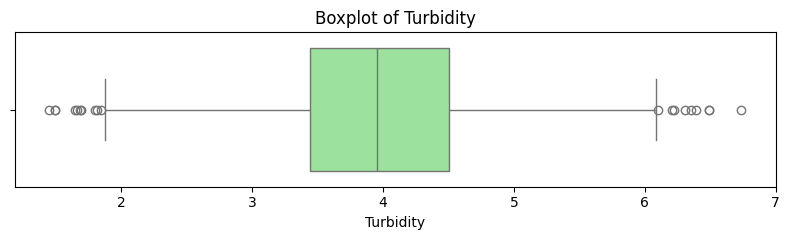

In [27]:
features = df_updated.columns.drop('Potability')

for col in features:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=df_updated[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# Correlation Matrix
Plot the correlation matrix to determine if there exist any correlation between the features.:

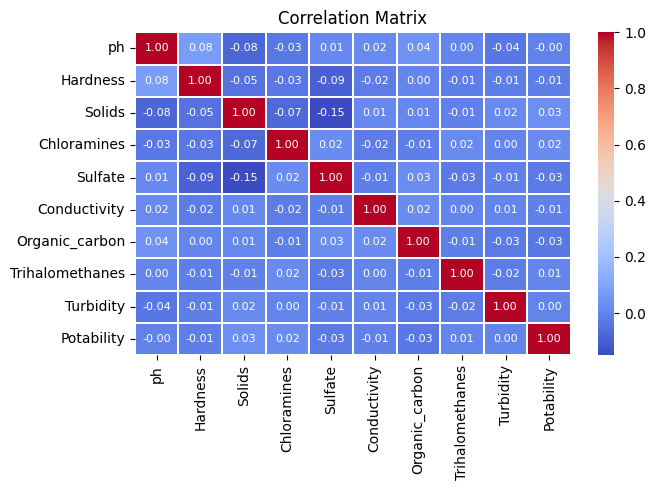

In [28]:
corr_matrix = df_updated.corr()

plt.figure(figsize=(7, 5))
sns.heatmap( corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.3, annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()

The correlation matrix shows that the values are very close to 0. This indicates that there is no or low relationship between the features.

# Feature Scaling


In [29]:
X = df_updated.drop(columns=['Potability'])
Y = df_updated['Potability']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Create a dataframe from the scaled data.

In [30]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Perform the principal componenet analysis to identify if the number of features can be reduced or not.



In [31]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Now draw a cumulative explained variance vs number of components to determine which components are most important.

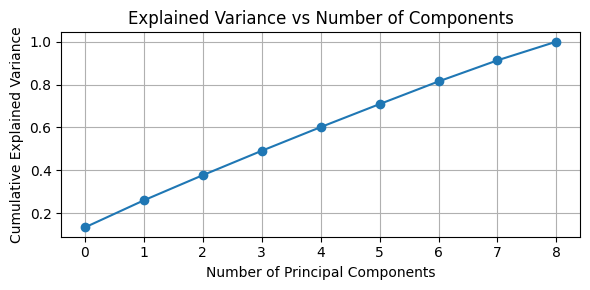

In [32]:
plt.figure(figsize=(6, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_explained_variance.png', dpi=300)
plt.show()

The graph shows a linear relationship between the number of principal components and cumulative explained variance which means that each component is equally important and cannot be removed.

Split the data into test and train datasets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.3, random_state=42)

In [34]:
results = []

In [35]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, results_list, model_type):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    con_matrix = confusion_matrix(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    prec_score = precision_score(y_test, y_pred, zero_division=1)
    rec_score = recall_score(y_test, y_pred)
    f1_score_ = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    print(f"----- {model_name} ------ {model_type}-----\n")
    print(f"Confusion Matrix:\n{con_matrix}\n")
    print(f"Accuracy: {acc_score}")
    print(f"Precision: {prec_score}")
    print(f"Recall: {rec_score}")
    print(f"F1 Score: {f1_score_}")
    print(f"AUC: {auc_score}\n")

    results_list.append({
        'Model': model_name,
        'Accuracy': acc_score,
        'Precision': prec_score,
        'Recall': rec_score,
        'F1-Score': f1_score_,
        'AUC': auc_score,
        'Model-Type' : model_type
    })

# Random Forest

In [36]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test, results, "Normal")

----- Random Forest ------ Normal-----

Confusion Matrix:
[[532  41]
 [170 240]]

Accuracy: 0.785350966429298
Precision: 0.8540925266903915
Recall: 0.5853658536585366
F1 Score: 0.6946454413892909
AUC: 0.7569063125186226



# SVM

In [37]:
svm_model = SVC(random_state=42)
evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test, results, "Normal")

----- SVM ------ Normal-----

Confusion Matrix:
[[530  43]
 [301 109]]

Accuracy: 0.6500508646998983
Precision: 0.7171052631578947
Recall: 0.2658536585365854
F1 Score: 0.3879003558718861
AUC: 0.5954050142595667



# XGBoost

In [38]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test, results, "Normal")

----- XGBoost ------ Normal-----

Confusion Matrix:
[[502  71]
 [156 254]]

Accuracy: 0.7690742624618515
Precision: 0.7815384615384615
Recall: 0.6195121951219512
F1 Score: 0.691156462585034
AUC: 0.7478014727791257



# kNN

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, "kNN", X_train, X_test, y_train, y_test, results, "Normal")

----- kNN ------ Normal-----

Confusion Matrix:
[[450 123]
 [256 154]]

Accuracy: 0.6144455747711088
Precision: 0.555956678700361
Recall: 0.375609756097561
F1 Score: 0.4483260553129549
AUC: 0.5804750351168434



Now we have obtained the results from all the models. Display the results.

In [40]:
results_df = pd.DataFrame(results)

results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,AUC,Model-Type
0,Random Forest,0.785351,0.854093,0.585366,0.694645,0.756906,Normal
2,XGBoost,0.769074,0.781538,0.619512,0.691156,0.747801,Normal
1,SVM,0.650051,0.717105,0.265854,0.387900,0.595405,Normal
3,kNN,0.614446,0.555957,0.375610,0.448326,0.580475,Normal


Plot the performance metrices of all the models on a bar chart to identify the top performing models.

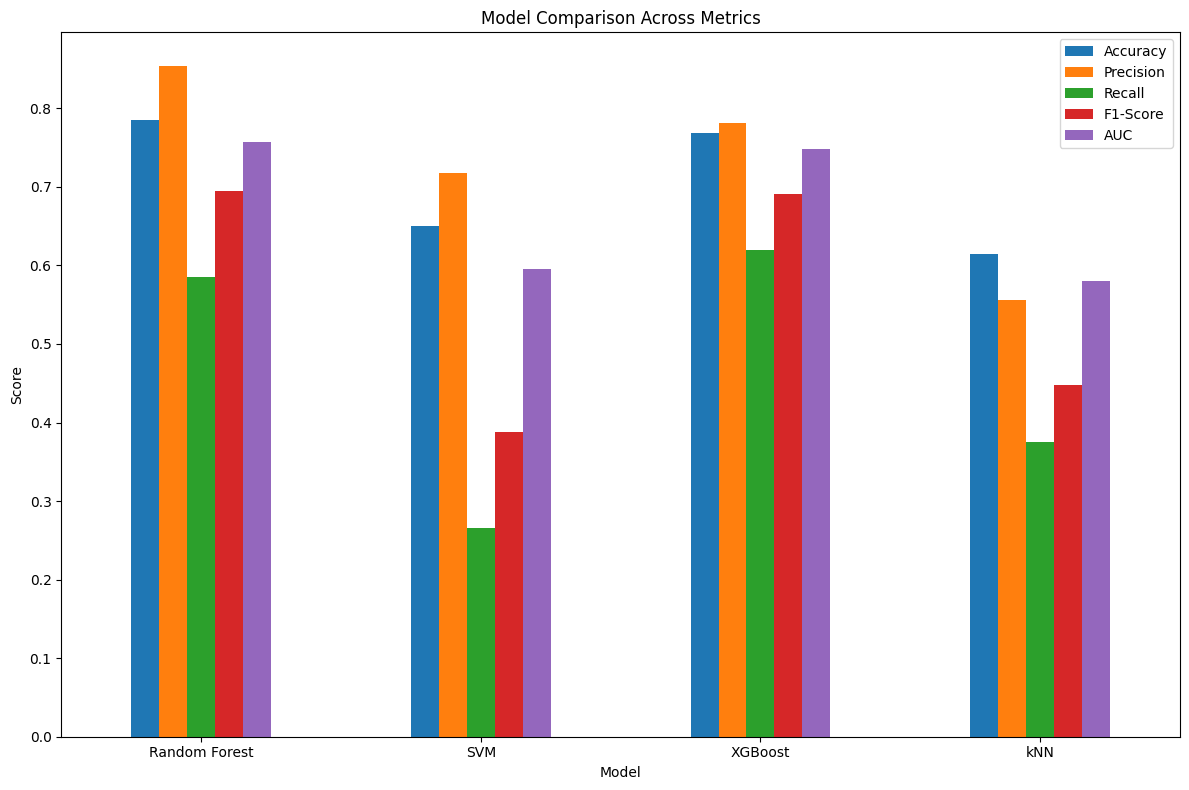

In [41]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison Across Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('model_comparison_accross_metrics.png', dpi=300)
plt.show()


The above table of results and bar chart shows that the Random Forest and XGBoost are the top performing models.

# Feature Importance
This helps in identfying the features which are important for the performance of the model. Through feature importance we can identify those features which can be removed leading towards the dimensionality reduction without effecting the model performance.

Identify the important features from the random forest model and plot it as a bar chart.

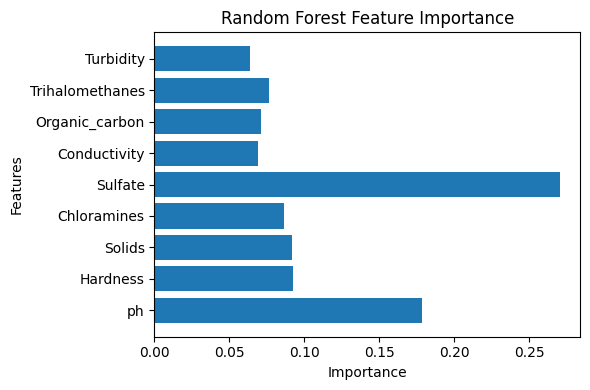

In [42]:
feature_importance_rf = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
plt.barh(X_train.columns, feature_importance_rf)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png', dpi=300)
plt.show()

Identify the important features from the XGBoost model.

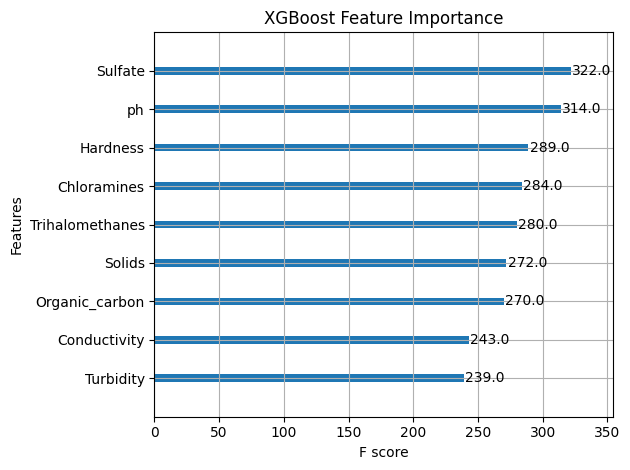

In [43]:
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.savefig('XGBoost_feature_importance.png', dpi=300)
plt.show()

From the two above plotted bar charts we can pick the most important features which are common in both models:


*   ph
*   Sulfate
*   Solids
*Hardness
*Chloramines

In [44]:
important_features = ['Sulfate', 'ph', 'Solids', 'Hardness', 'Chloramines']
X_important = X_scaled_df[important_features]

In [45]:
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, Y, test_size=0.3, random_state=42)

Now we will train and test the Random Forest Model using the important features.

In [46]:
evaluate_model(rf_model, "Random Forest", X_train_important, X_test_important, y_train_important, y_test_important, results, "Dimensionality Reduction")

----- Random Forest ------ Dimensionality Reduction-----

Confusion Matrix:
[[514  59]
 [153 257]]

Accuracy: 0.7843336724313327
Precision: 0.8132911392405063
Recall: 0.6268292682926829
F1 Score: 0.7079889807162535
AUC: 0.7619312135529732



Train and test the XGBoost model with dimensionality reduction

In [47]:
evaluate_model(xgb_model, "XGBoost", X_train_important, X_test_important, y_train_important, y_test_important, results, "Dimensionality Reduction")

----- XGBoost ------ Dimensionality Reduction-----

Confusion Matrix:
[[500  73]
 [151 259]]

Accuracy: 0.7721261444557477
Precision: 0.7801204819277109
Recall: 0.6317073170731707
F1 Score: 0.6981132075471698
AUC: 0.7521538330566553



# Hyper Parameter Tunning
For hyper parameter tunning we will only focus on the Random Forest and XGBoost models.

Use GridSearch method to identify the best parameters for the Random Forest Model.

In [48]:
param_grid_rf = {
    'n_estimators': [100, 110, 115],
    'max_depth': [2, 4, None],
    'min_samples_split': [2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train_important, y_train_important)

print(f"Best Hyperparameters: {grid_search_rf.best_params_} \n")

tuned_rf_model = grid_search_rf.best_estimator_

evaluate_model(tuned_rf_model, "Random Forest", X_train_important, X_test_important, y_train_important, y_test_important, results, "Tuned")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 110} 

----- Random Forest ------ Tuned-----

Confusion Matrix:
[[509  64]
 [145 265]]

Accuracy: 0.7873855544252288
Precision: 0.8054711246200608
Recall: 0.6463414634146342
F1 Score: 0.7171853856562923
AUC: 0.7673243093687482



Hyper parameter tunning of XGBoost using the Parameter Grid Search.



In [49]:
param_grid_xgb = {
    'n_estimators': [100, 110, 115],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 4, 6]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5,  scoring='accuracy')
grid_search_xgb.fit(X_train_important, y_train_important)

print(f"Best Hyperparameters: {grid_search_xgb.best_params_}")

tuned_xgb_model = grid_search_xgb.best_estimator_

evaluate_model(tuned_xgb_model, "XGBoost", X_train_important, X_test_important, y_train_important, y_test_important, results, "Tuned")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 115}
----- XGBoost ------ Tuned-----

Confusion Matrix:
[[508  65]
 [152 258]]

Accuracy: 0.7792472024415056
Precision: 0.7987616099071208
Recall: 0.6292682926829268
F1 Score: 0.703956343792633
AUC: 0.7579151236538544



# Removing Critical feature
In this part we will drop one of the most important features such as Sulpate or ph and determine how it will impact the performance of the model.

In [50]:
important_features_exclude_ph = ['Sulfate', 'Solids', 'Hardness', 'Chloramines']
X_important_exclude_ph = X_scaled_df[important_features_exclude_ph]

In [51]:
X_train_important_exclude_ph, X_test_important_exclude_ph, y_train_important_exclude_ph, y_test_important_exclude_ph = train_test_split(X_important_exclude_ph, Y, test_size=0.3, random_state=42)

Evaluate the Random Forest Performance after dropping the ph.

In [52]:
evaluate_model(rf_model, "Random Forest", X_train_important_exclude_ph, X_test_important_exclude_ph, y_train_important_exclude_ph, y_test_important_exclude_ph, results, "Critical Feature Removed")

----- Random Forest ------ Critical Feature Removed-----

Confusion Matrix:
[[487  86]
 [213 197]]

Accuracy: 0.6958290946083419
Precision: 0.696113074204947
Recall: 0.48048780487804876
F1 Score: 0.5685425685425686
AUC: 0.6652002724215723



Evaluate the model performance for XGBoost without ph

In [53]:
evaluate_model(xgb_model, "XGBoost", X_train_important_exclude_ph, X_test_important_exclude_ph, y_train_important_exclude_ph, y_test_important_exclude_ph, results, "Critical Feature Removed")

----- XGBoost ------ Critical Feature Removed-----

Confusion Matrix:
[[466 107]
 [210 200]]

Accuracy: 0.6775178026449644
Precision: 0.6514657980456026
Recall: 0.4878048780487805
F1 Score: 0.5578800557880056
AUC: 0.6505342016770953



By dropping pH both model shown significant decrease in the performane metrics

In [54]:
results_df = pd.DataFrame(results)

In [55]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC,Model-Type
0,Random Forest,0.785351,0.854093,0.585366,0.694645,0.756906,Normal
1,SVM,0.650051,0.717105,0.265854,0.387900,0.595405,Normal
2,XGBoost,0.769074,0.781538,0.619512,0.691156,0.747801,Normal
3,kNN,0.614446,0.555957,0.375610,0.448326,0.580475,Normal
4,Random Forest,0.784334,0.813291,0.626829,0.707989,0.761931,Dimensionality Reduction
5,XGBoost,0.772126,0.780120,0.631707,0.698113,0.752154,Dimensionality Reduction
6,Random Forest,0.787386,0.805471,0.646341,0.717185,0.767324,Tuned
7,XGBoost,0.779247,0.798762,0.629268,0.703956,0.757915,Tuned
8,Random Forest,0.695829,0.696113,0.480488,0.568543,0.665200,Critical Feature Removed
9,XGBoost,0.677518,0.651466,0.487805,0.557880,0.650534,Critical Feature Removed


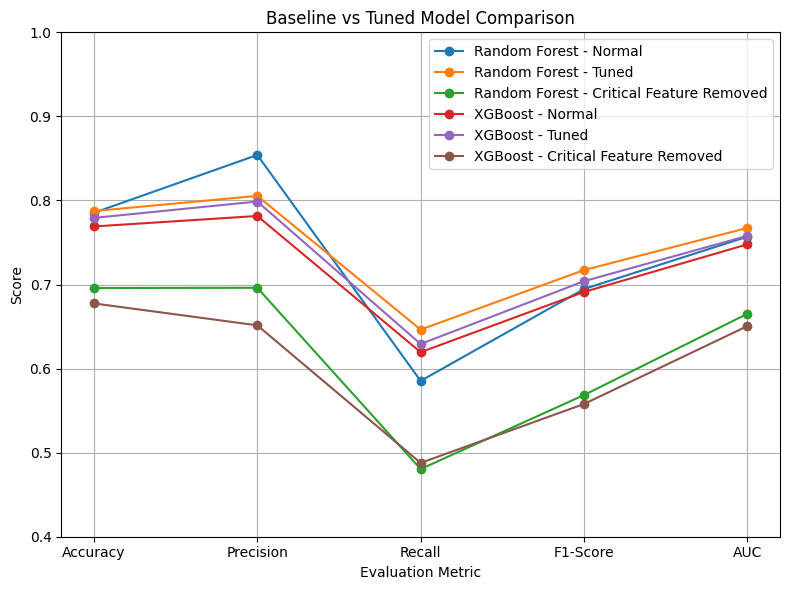

In [56]:

filtered_df = results_df[
    (results_df['Model-Type'].isin(['Normal', 'Tuned', 'Critical Feature Removed'])) &
    (results_df['Model'].isin(['Random Forest', 'XGBoost']))
]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

plt.figure(figsize=(8, 6))

for model in ['Random Forest', 'XGBoost']:
    for model_type in ['Normal', 'Tuned', 'Critical Feature Removed']:
        row = filtered_df[
            (filtered_df['Model'] == model) &
            (filtered_df['Model-Type'] == model_type)
        ]
        if not row.empty:
            scores = [row[metric].values[0] for metric in metrics]
            label = f"{model} - {model_type}"
            plt.plot(metrics, scores, marker='o', label=label)

plt.title("Baseline vs Tuned Model Comparison")
plt.xlabel("Evaluation Metric")
plt.ylabel("Score")
plt.ylim(0.4, 1.0)
plt.grid(True)
plt.legend()
plt.savefig('line_chart.png', dpi=300)
plt.tight_layout()
plt.show()


# Stratified K-Fold Validation

In [57]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_fold_results = []

In [58]:
def evaluate_model_using_k_fold(model,model_name, X, Y, cv, results):
    evaluation_metrics = ['f1', 'accuracy', 'precision', 'recall', 'roc_auc']


    for metric in evaluation_metrics:
        scores = cross_val_score(model, X, Y, scoring=metric, cv=cv)
        results.append( {
            'mean': scores.mean(),
            'std': scores.std(),
            'model' : model_name,
            'metric' : metric,
            'full_scores' : scores

        })
        print(f"{metric}: {scores.mean():.3f} ± {scores.std():.3f}")

Evaluate Random Forest using Stratified K-Fold

In [59]:
evaluate_model_using_k_fold(tuned_rf_model,"Random Forest", X_important, Y, skf, k_fold_results)

f1: 0.713 ± 0.021
accuracy: 0.794 ± 0.015
precision: 0.780 ± 0.032
recall: 0.659 ± 0.031
roc_auc: 0.876 ± 0.016


Evaluate XGBoost using Stratified K-Fold

In [60]:
evaluate_model_using_k_fold(tuned_xgb_model,"XGBoost", X_important, Y, skf, k_fold_results)

f1: 0.713 ± 0.022
accuracy: 0.792 ± 0.018
precision: 0.774 ± 0.038
recall: 0.661 ± 0.028
roc_auc: 0.873 ± 0.017


Convert the k-fold results into the data frame.

In [61]:
df_k_fold_results = pd.DataFrame(k_fold_results)

In [62]:
df_k_fold_results

,mean,std,model,metric,full_scores
0,0.713386,0.020630,Random Forest,f1,"[0.7004048582995951, 0.7181628392484343, 0.725..."
1,0.793657,0.014533,Random Forest,accuracy,"[0.774390243902439, 0.7938931297709924, 0.8, 0..."
2,0.779955,0.031624,Random Forest,precision,"[0.726890756302521, 0.7713004484304933, 0.7828..."
3,0.658805,0.031396,Random Forest,recall,"[0.67578125, 0.671875, 0.67578125, 0.596078431..."
4,0.875894,0.015543,Random Forest,roc_auc,"[0.8734033203125, 0.8612057487468673, 0.886376..."
5,0.712518,0.022471,XGBoost,f1,"[0.6967213114754098, 0.7133757961783439, 0.717..."
6,0.791825,0.017541,XGBoost,accuracy,"[0.774390243902439, 0.7938931297709924, 0.7862..."
7,0.774349,0.037776,XGBoost,precision,"[0.7327586206896551, 0.7813953488372093, 0.741..."
8,0.661164,0.028061,XGBoost,recall,"[0.6640625, 0.65625, 0.6953125, 0.611764705882..."
9,0.872786,0.017475,XGBoost,roc_auc,"[0.8692480468750001, 0.8594631109022557, 0.873..."


Find 95% confidence interval using the 5-folds.

In [63]:
n_folds = 5
df_k_fold_results['ci_95'] = 1.96 * (df_k_fold_results['std'] / np.sqrt(n_folds))

In [64]:
df_k_fold_results

,mean,std,model,metric,full_scores,ci_95
0,0.713386,0.020630,Random Forest,f1,"[0.7004048582995951, 0.7181628392484343, 0.725...",0.018083
1,0.793657,0.014533,Random Forest,accuracy,"[0.774390243902439, 0.7938931297709924, 0.8, 0...",0.012739
2,0.779955,0.031624,Random Forest,precision,"[0.726890756302521, 0.7713004484304933, 0.7828...",0.027719
3,0.658805,0.031396,Random Forest,recall,"[0.67578125, 0.671875, 0.67578125, 0.596078431...",0.027520
4,0.875894,0.015543,Random Forest,roc_auc,"[0.8734033203125, 0.8612057487468673, 0.886376...",0.013624
5,0.712518,0.022471,XGBoost,f1,"[0.6967213114754098, 0.7133757961783439, 0.717...",0.019697
6,0.791825,0.017541,XGBoost,accuracy,"[0.774390243902439, 0.7938931297709924, 0.7862...",0.015375
7,0.774349,0.037776,XGBoost,precision,"[0.7327586206896551, 0.7813953488372093, 0.741...",0.033112
8,0.661164,0.028061,XGBoost,recall,"[0.6640625, 0.65625, 0.6953125, 0.611764705882...",0.024597
9,0.872786,0.017475,XGBoost,roc_auc,"[0.8692480468750001, 0.8594631109022557, 0.873...",0.015318


Apply the Wilcoxon signed rank test to identify which model is performing best among XGBoost and Random Forest

In [65]:
evaluation_metrics = ['f1', 'accuracy', 'precision', 'recall', 'roc_auc']
for metric in evaluation_metrics:
    rf_scores = df_k_fold_results[(df_k_fold_results['model'] == 'Random Forest') & (df_k_fold_results['metric'] == metric)]['full_scores'].values[0]
    xgb_scores = df_k_fold_results[(df_k_fold_results['model'] == 'XGBoost') & (df_k_fold_results['metric'] == metric)]['full_scores'].values[0]

    stat, p = wilcoxon(rf_scores, xgb_scores)
    print(f"{metric} Wilcoxon p-value: {p:.4f} → {' Significant' if p < 0.05 else 'Not significant'}")

f1 Wilcoxon p-value: 0.8125 → Not significant
accuracy Wilcoxon p-value: 0.5930 → Not significant
precision Wilcoxon p-value: 0.8125 → Not significant
recall Wilcoxon p-value: 0.6250 → Not significant
roc_auc Wilcoxon p-value: 0.4375 → Not significant


C:\Users\Mustafa\anaconda3\envs\pyspark_env\lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


# Confusion Matrixx
Random Forest

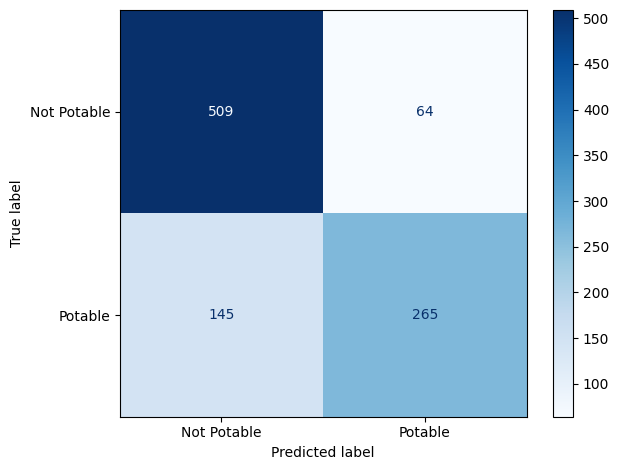

In [66]:
y_pred = tuned_rf_model.predict(X_test_important)
cm = confusion_matrix(y_test_important, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Potable", "Potable"])
disp.plot(cmap="Blues")

plt.tight_layout()
plt.savefig("confusion_matrix_random_fotrest.png", dpi=300)
plt.show()


XGBoost:

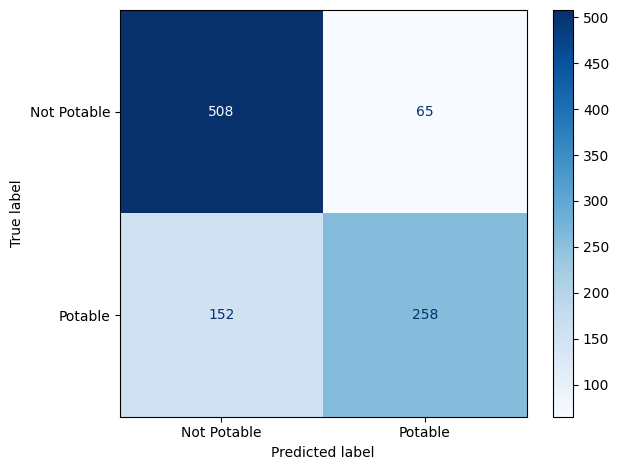

In [67]:
y_pred = tuned_xgb_model.predict(X_test_important)
cm = confusion_matrix(y_test_important, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Potable", "Potable"])
disp.plot(cmap="Blues")

plt.tight_layout()
plt.savefig("confusion_matrix_xgb.png", dpi=300)
plt.show()